In [1]:
#Importing the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
titanic_df = pd.read_csv("titanic2.csv")


In [4]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1.0,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,NaN,3,female,NaN,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,NaN,1,female,NaN,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0.0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1.0,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0.0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1.0,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Scatter plot to detect outliers

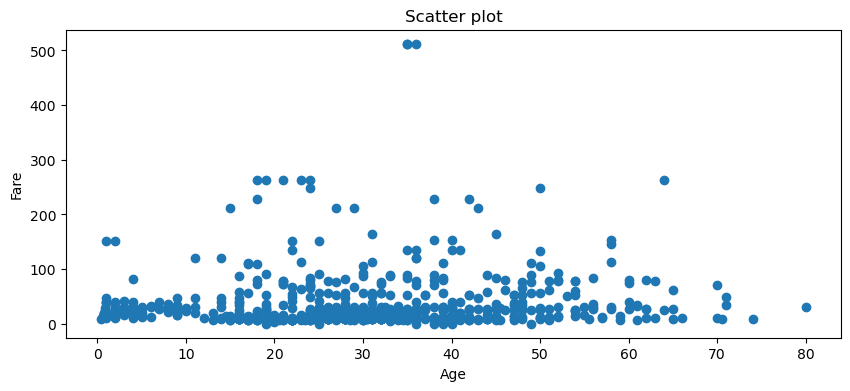

In [5]:
fig,ax = plt.subplots(figsize=(10,4))
ax.scatter(titanic_df['age'],titanic_df['fare'])
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.title("Scatter plot")
plt.show()

# Box plot to detect outliers

<Axes: >

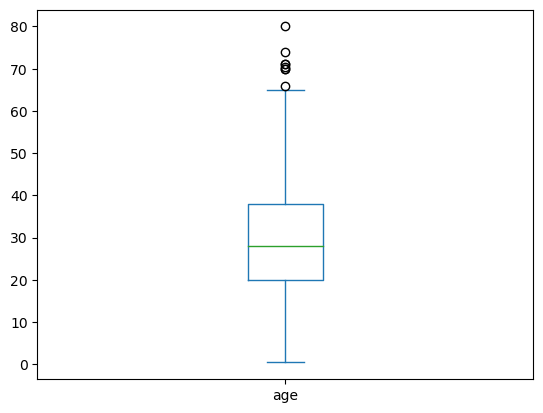

In [6]:
titanic_df['age'].plot(kind='box')

In [7]:
# finding the 1st quartile
q1 = titanic_df["age"].quantile(0.25)

# finding the 3rd quartile
q3 = titanic_df['age'].quantile(0.75)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

In [8]:
age_arr = titanic_df["age"]
outliers = age_arr[(age_arr <= lower_bound) | (age_arr >= upper_bound)]
print('The following are the outliers in the boxplot of age:\n',outliers)

The following are the outliers in the boxplot of age:
 33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: age, dtype: float64


# Histogram plot to detect outliers

<Axes: ylabel='Frequency'>

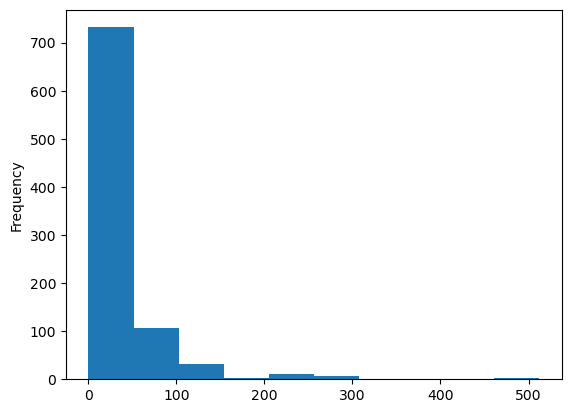

In [9]:
titanic_df['fare'].plot(kind='hist')

# Remove data objects with outliers

In [10]:
upperIndex = titanic_df[titanic_df['age']>upper_bound].index
titanic_df.drop(upperIndex,inplace=True)
lowerIndex = titanic_df[titanic_df['age']<lower_bound].index
titanic_df.drop(lowerIndex,inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     881 non-null    float64
 1   pclass       883 non-null    int64  
 2   sex          883 non-null    object 
 3   age          704 non-null    float64
 4   sibsp        883 non-null    int64  
 5   parch        883 non-null    int64  
 6   fare         883 non-null    float64
 7   embarked     881 non-null    object 
 8   class        883 non-null    object 
 9   who          883 non-null    object 
 10  adult_male   883 non-null    bool   
 11  deck         200 non-null    object 
 12  embark_town  881 non-null    object 
 13  alive        883 non-null    object 
 14  alone        883 non-null    bool   
dtypes: bool(2), float64(3), int64(3), object(7)
memory usage: 98.3+ KB


# Replacing outliers with upper and lower cap:

In [12]:
titanic_df = pd.read_csv("titanic2.csv")

In [13]:
#upper and lower cap
# Winzorization method
fare_arr = titanic_df["fare"]
upper_cap = np.percentile(fare_arr,1)
lower_cap = np.percentile(fare_arr,99)
outliers = fare_arr[(fare_arr < upper_cap) | (fare_arr > lower_cap)]
print('The following are the outliers in the boxplot of fare:\n',outliers)

The following are the outliers in the boxplot of fare:
 27     263.0000
88     263.0000
258    512.3292
311    262.3750
341    263.0000
438    263.0000
679    512.3292
737    512.3292
742    262.3750
Name: fare, dtype: float64


In [14]:
for i in titanic_df['fare']:
    if i<lower_bound :
        titanic_df['fare'] = titanic_df['fare'].replace(i,lower_cap)
    elif i>upper_bound :
        titanic_df['fare'] = titanic_df['fare'].replace(i,upper_cap)

In [15]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    float64
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          712 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(3), int64(3), object(7)
memory usage: 92.4+ KB


# Replacing outliers with Mean

In [16]:
titanic_df = pd.read_csv("titanic2.csv")

In [17]:
m = np.mean(titanic_df['age'])
print('mean:',m)
for i in titanic_df['age']:
    if i<lower_bound or i>upper_bound :
        titanic_df['age'] = titanic_df['age'].replace(i,m)

mean: 29.696867977528086


# Replacing outliers with median

In [18]:
titanic_df = pd.read_csv("titanic2.csv")

In [19]:
q1 = titanic_df["age"].quantile(0.25)

# finding the 3rd quartile
q3 = titanic_df['age'].quantile(0.75)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

In [20]:
m = titanic_df['age'].median()
print(m)
for i in titanic_df['age']:
    if i<lower_bound or i>upper_bound :
        titanic_df['age'] = titanic_df['age'].replace(i,m)

28.0
